<a href="https://colab.research.google.com/github/saketh2003/codealpha_tasks/blob/main/A_B_Testing_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Read the data
df = pd.read_csv("marketing_AB.csv")


In [ ]:
#first few observation
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
#check if we have duplicates user id
df.duplicated(subset='user id').sum()

np.int64(0)

In [ ]:
#Draw unwanted columns
df.drop(['Unnamed: 0','user id'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:

df_cat = df[['test group', 'converted', 'most ads day','most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


In [ ]:
for i in df_cat.columns:
 print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


Univarite Analysis

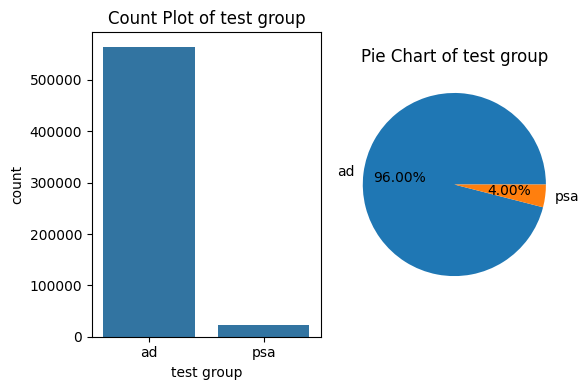

In [ ]:
variable  = 'test group'
plt.figure(figsize=(6,4))

#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot of {variable}')

#Pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

plt.tight_layout()
plt.show()


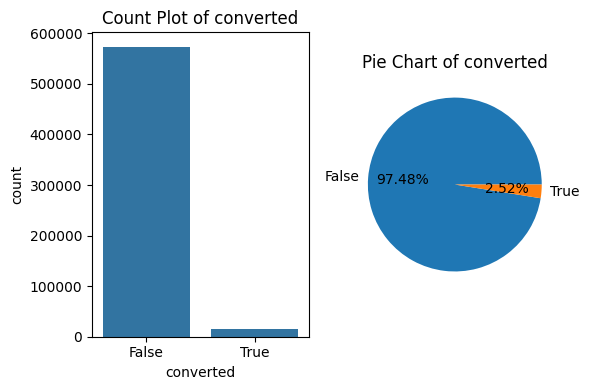

In [ ]:
variable = 'converted'

plt.figure(figsize=(6,4))

#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot of {variable}')

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

plt.tight_layout()
plt.show()

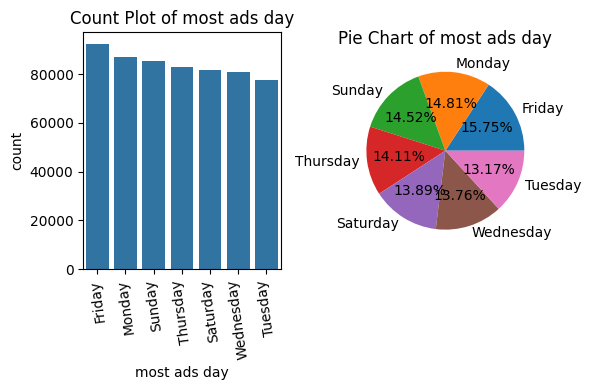

In [ ]:
variable = 'most ads day'

plt.figure(figsize=(6,4))

#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot of {variable}')
plt.xticks(rotation=98)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

plt.tight_layout()
plt.show()

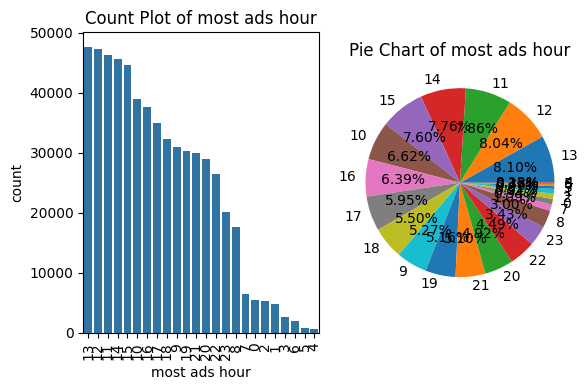

In [ ]:
variable = 'most ads hour'

plt.figure(figsize=(6,4))

#Count Plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order=df_cat[variable].value_counts().index)
plt.title(f'Count Plot of {variable}')
plt.xticks(rotation=90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart of {variable}')

plt.tight_layout()
plt.show()

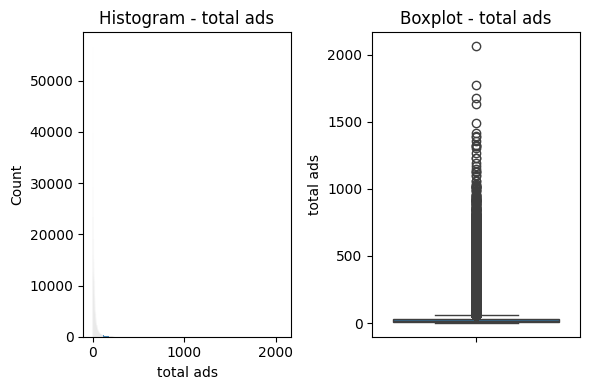

In [ ]:
variable = 'total ads'
plt.figure(figsize=(6,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

#Pie chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

In [ ]:
df['total ads'].describe()

,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


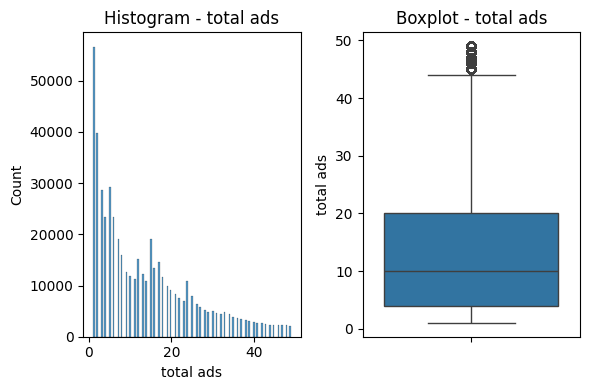

In [ ]:
variable = 'total ads'
plt.figure(figsize=(6,4))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

#Pie chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df [df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

Bivarite Analysis

In [ ]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


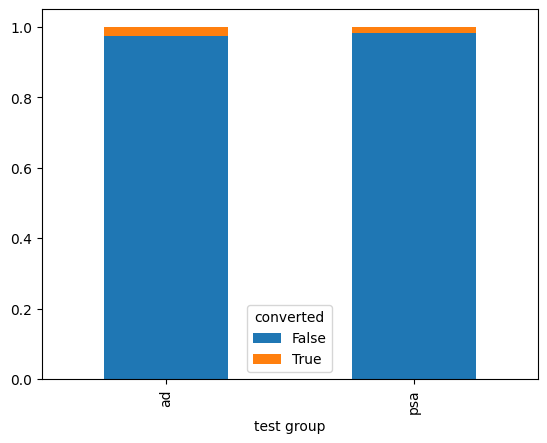

In [ ]:
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


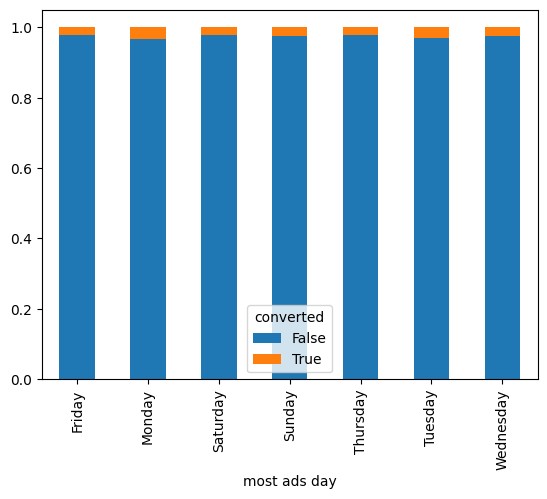

In [ ]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_test_group.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


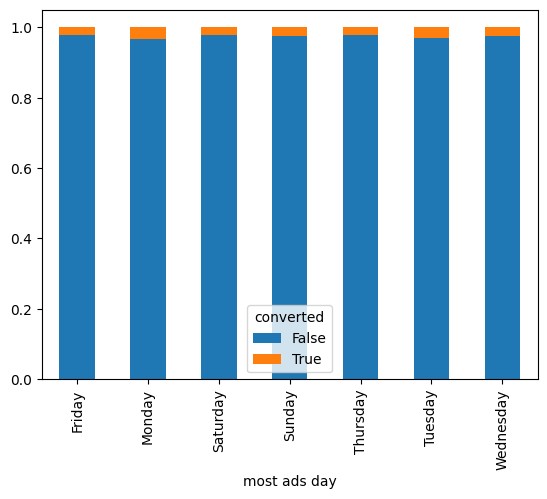

In [ ]:
ct_conversion_hour = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True);

<Axes: xlabel='converted', ylabel='total ads'>

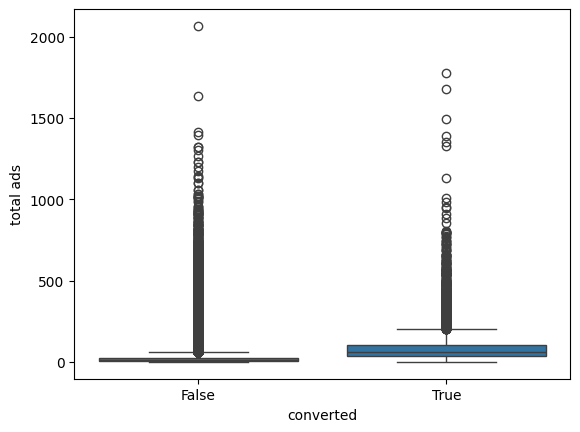

In [ ]:
sns.boxplot(x = 'converted', y = 'total ads', data = df)

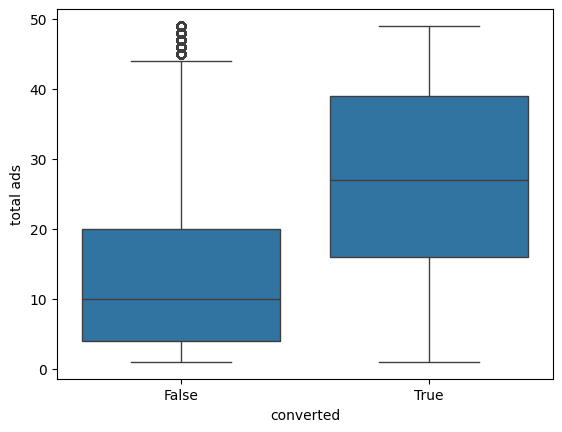

In [ ]:
sns.boxplot(x = 'converted', y='total ads', data= df[df['total ads'] < 50]);

Statistical Tests

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted':
    contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-squared test for {variable}:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")

    #check for significance
    if p < alpha:
      print(f"The difference in conversion rate across {variable} is statistically significant.")
    else:
      print(f"There is no significant difference in conversion rate across {variable}.")



Chi-squared test for test group:
Chi-squared statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
The difference in conversion rate across test group is statistically significant.
Chi-squared test for most ads day:
Chi-squared statistic: 410.0478857936585
P-value: 1.932184379244731e-85
The difference in conversion rate across most ads day is statistically significant.
Chi-squared test for most ads hour:
Chi-squared statistic: 430.76869230822086
P-value: 8.027629823696771e-77
The difference in conversion rate across most ads hour is statistically significant.


In [ ]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu,

shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")


levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[df['converted']]['total ads'])
print(f"Levene's test for eqyality of variance: p-value = {levene_p_value}")



Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for eqyality of variance: p-value = 1.0


In [ ]:
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha:
  t_stat , t_p_value = ttest_ind(df[df['converted']]['total ads'], df[df['converted']]['total ads'] ['total ads'])
  print(f"T-test for equal means: p-value = {t_p_value}")
else:
  u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[df['converted']]['total ads'])
  print(f"Mann-Whitney U test for equal medians: p-value = {u_p_value}")

Mann-Whitney U test for equal medians: p-value = 1.0
